In [1]:
#import library
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read images
full_img = cv2.imread("pexels-el-sultan-3220386.jpg")
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

face = cv2.imread("fac_img.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    
height, wight, channels = face.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

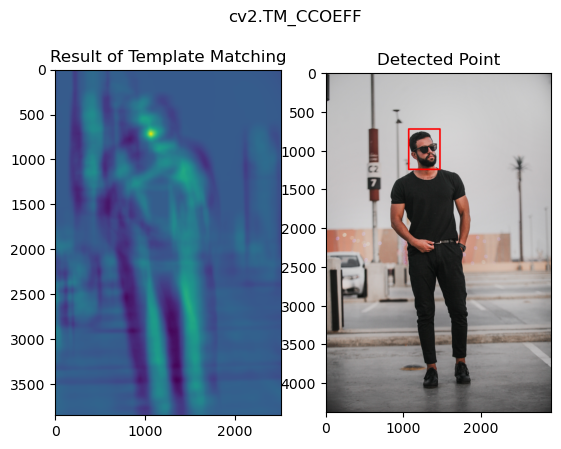

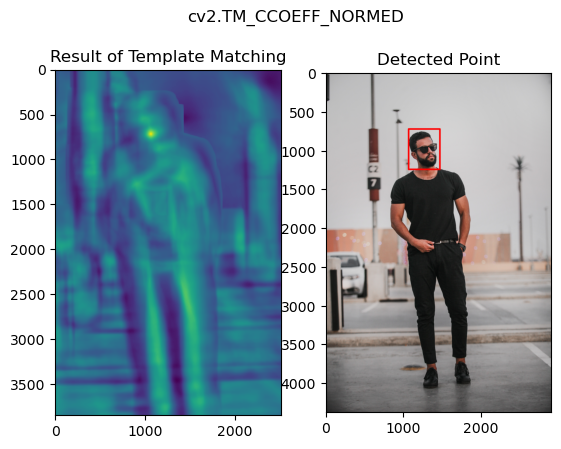

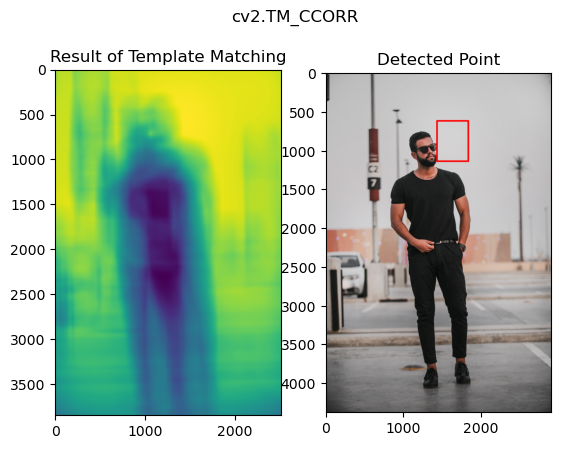

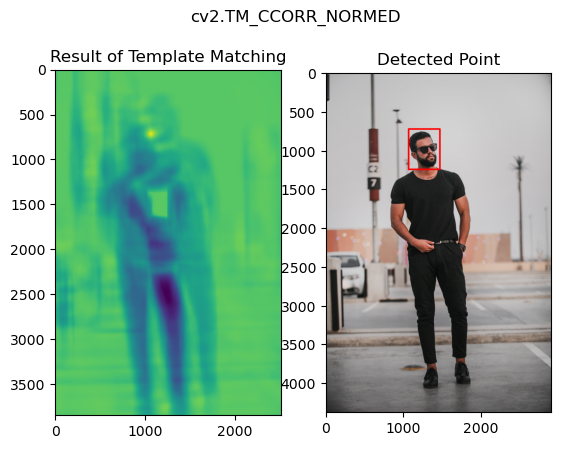

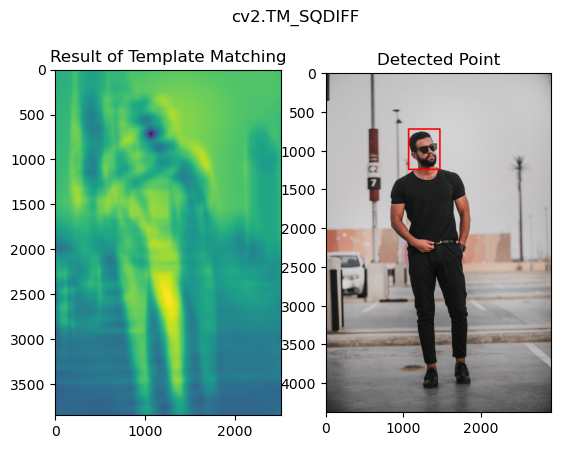

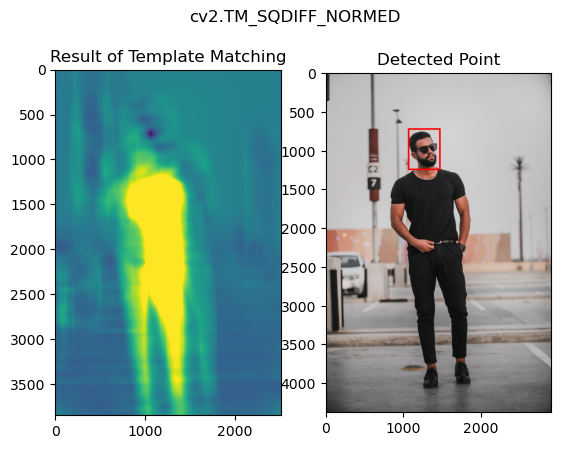

In [4]:
#buld template maching
for m in methods:
    
    full_copy = full_img.copy()
    
    # Get the actual function instead of the string
    method = eval(m)
    
    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy, face, method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + wight, top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left, bottom_right, (255, 0, 0), 20)
    
    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')